### Short strangle with delta hedging

https://zerodha.com/varsity/chapter/the-long-short-strangle/

Coming to the reality we can't predict market accurately and it may lead to loss.<br/>
So in practice market neutral strategies are very helpful and can give decent returns with very less risk<br/>
One such strategy is to sell put and call options such that the overall delta of our positions remains 0.

Try to code the above strategy and manage delta just like given in the previous strategy.<br/>
You will only use 35000 puts and calls for this strategy.<br/>
Initially sell 10 lots of puts and correspondingly sell x lots of calls such that the delta becomes 0.<br/>
Then manage the delta accordingly by just selling or buying call options and not changing the number of put options sold.<br/>
Also plot the profit graph on whole data and see the results!<br/>

Hint: Do remember that unlike futures which has delta of 1 delta of 35000 puts options would change everytime.

## Importing important libraries

In [ ]:
pip install py_vollib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

import py_vollib.black_scholes.greeks.analytical as derivatives

import math

### Initialising everything required to calculate delta

In [ ]:
df_call_35000 = pd.read_csv('/content/OPTIDX_BANKNIFTY_CE_28-May-2021_TO_24-Jun-2021_1 (1).csv')
df_call_35000.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,CE,35000,1394.65,1459.5,1132.0,1213.55,1224.50,1213.55,18138,164479.84,5772.34,283425,39000,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,CE,35000,1197.95,1339.0,1021.6,1308.30,1281.95,1308.30,14456,130864.56,4374.56,245275,-38150,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,CE,35000,1291.90,1398.0,1112.3,1155.05,1163.00,1155.05,15231,137967.95,4696.70,345025,99750,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,CE,35000,1099.30,1145.7,982.5,1128.05,1122.00,1128.05,12258,110507.46,3249.96,342375,-2650,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,CE,35000,1163.20,1342.5,1111.7,1265.45,1270.00,1265.45,7511,68025.76,2304.51,307825,-34550,-


In [ ]:
df_put_35000 = pd.read_csv('/content/OPTIDX_BANKNIFTY_PE_28-May-2021_TO_24-Jun-2021.csv')
df_put_35000.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,PE,35000,940.00,984.85,820.20,907.15,856.0,907.15,30957,277944.81,7071.06,217275,-3850,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,PE,35000,886.00,975.50,690.45,706.40,713.9,706.40,22393,200373.31,4434.56,215875,-1400,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,PE,35000,682.35,795.25,605.40,701.25,697.0,701.25,22207,198214.51,3903.26,245775,29900,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,PE,35000,747.50,799.95,581.80,601.55,587.7,601.55,18375,164002.20,3220.95,235300,-10475,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,PE,35000,486.50,564.00,447.15,484.85,489.0,484.85,19913,176748.22,2509.47,217500,-17800,-


### Initialising everything required to calculate delta

In [ ]:
symbol = '^NSEBANK'
end = '2021-06-25'
start = '2021-05-28'


# Read data
df = yf.download(symbol,start,end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.039062,0
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.234375,0
2021-06-01,35639.750000,35713.898438,35241.199219,35337.199219,35336.789062,0
2021-06-02,35271.601562,35415.851562,35070.300781,35373.750000,35373.339844,0
2021-06-03,35536.449219,35723.699219,35413.000000,35649.000000,35648.585938,0


In [ ]:
symbol = '^NSEBANK'
end = '2021-05-28'
start = '2020-05-28'

df_year = yf.download(symbol,start,end)

df_year.head()
# Read data
#You need to read the from the files provided on NSE Bank for the time given above.

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-28,18924.449219,19455.550781,18818.949219,19169.800781,19169.578125,561100
2020-05-29,18962.000000,19358.050781,18729.900391,19297.250000,19297.025391,581700
2020-06-01,19728.900391,20225.349609,19632.900391,19959.900391,19959.667969,558100
2020-06-02,20120.599609,20615.750000,19852.550781,20530.199219,20529.960938,448300
2020-06-03,20966.599609,21619.550781,20822.000000,20940.699219,20940.455078,616900


In [ ]:
ret = df_year['Close'].pct_change()[1:]

In [ ]:
ret.head()

Date
2020-05-29    0.006648
2020-06-01    0.034339
2020-06-02    0.028572
2020-06-03    0.019995
2020-06-04   -0.026277
Name: Close, dtype: float64

In [ ]:
daily_vol = ret.std()
daily_vol

0.018580334637206996

In [ ]:
#calculate the Annual Volatility using the daily volatility given above.
vol = daily_vol * np.sqrt(252)
vol

0.29495366835845543

In [ ]:
expiry = datetime.strptime('2021-06-24', '%Y-%m-%d')   #Expiry date

In [ ]:
time_left = expiry-df.index    #Time left in days
time_left

TimedeltaIndex(['27 days', '24 days', '23 days', '22 days', '21 days',
                '20 days', '17 days', '16 days', '15 days', '14 days',
                '13 days', '10 days',  '9 days',  '8 days',  '7 days',
                 '6 days',  '3 days',  '2 days',  '1 days',  '0 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)

In [ ]:
#Convert Time left in days to int data type
time=[int(i.total_seconds()/86400) for i in time_left]
time

[27, 24, 23, 22, 21, 20, 17, 16, 15, 14, 13, 10, 9, 8, 7, 6, 3, 2, 1, 0]

In [ ]:
#Assume we are starting the strategy at the opening time of 28th May
S = df['Open'][0]  #price of the underlying
K = 35000   #strike price
t = time[0]/365 #time left to expiry in years
sigma = vol #volatility
r = 0.06 #risk free rate
delta_to_maintain = 0

### Initial selling

In [ ]:
no_of_lots_put = 10      #number of lots of put sold
sell_avg_put = df_put_35000['Open'][0]   #selling average of seeling those lots
lot_size = 25
delta = derivatives.delta('p', S, K, t, r, sigma)*lot_size*no_of_lots_put  #total delta after selling 250 quantities of put

In [ ]:
-delta

103.43461645722918

In [ ]:
delta_per_lot_call = derivatives.delta('c', S, K, t, r, sigma)*lot_size  #delta per lot of call,i.e, delta of 25 quantities
delta_per_lot_call

14.656538354277082

In [ ]:
number_of_lots_call = math.ceil(-delta/delta_per_lot_call)  #number of lots of call to be sold
number_of_lots_call

8

In [ ]:
sell_avg_call = df_call_35000['Open'][0]  #selling average of that call options sold
sell_avg_call

1394.65

In [ ]:
#Before delta management ans few questions:

#Q1. If market moves up, what would happen to delta of put options? (increase/decrease)
#Ans : decrease

#Q2. If market moves up, what would happen to delta of call options? (increase/decrease)
#Ans : decrease

#Q3. What would be your ideal strategy in terms of buying/selling call options if market moves up to maintain a delta of 0.
#Ans : Sell call options

'''
Bonus Question: Assume that you have set a limit to selling of your quantities and you have reached that limit of yours.
Now the market went up. You have to manage your delta such that the final quantity sold by you remains the same.
What would you do?
Hint : Think about changing the strikes of options

Ans : Increase the strike price such that delta becomes zero
'''

'\nBonus Question: Assume that you have set a limit to selling of your quantities and you have reached that limit of yours.\nNow the market went up. You have to manage your delta such that the final quantity sold by you remains the same.\nWhat would you do?\nHint : Think about changing the strikes of options\n\nAns : Increase the strike price such that delta becomes zero\n'

### Delta Management

In [ ]:
number_of_lots_call =  math.ceil((delta_to_maintain - delta)/delta_per_lot_call)  #number of call lots to be sold(same as above)
sell_avg_call = df_call_35000['Open'][0]  #selling average(same as above)
profit = []

#Write the code for delta management
for i in range(len(df)-1):
    delta = derivatives.delta('p', df['Close'][i], K, time[i]/365, r, sigma)*no_of_lots_put*lot_size
    delta_per_lot_call = derivatives.delta('c', df['Close'][i], K, time[i]/365, r, sigma)*lot_size
    current_number_of_lots_call = math.ceil((delta_to_maintain-delta)/delta_per_lot_call)
    no_of_lots_added = current_number_of_lots_call - number_of_lots_call   #number of lots added/subtracted for selling
    sell_avg_call = (sell_avg_call*number_of_lots_call + no_of_lots_added*df_call_35000['Close'][i])/current_number_of_lots_call  #new selling avg of call
    number_of_lots_call = current_number_of_lots_call    #updating number of lots of calls sold
    profit.append((sell_avg_put - df_put_35000['Close'][i])*no_of_lots_put*lot_size + (sell_avg_call-df_call_35000['Close'][i])*lot_size*number_of_lots_call)
    #print(df_put_35000['Close'][i], sell_avg_put, sell_avg_call, df_call_35000['Close'][i], number_of_lots_call)

In [ ]:
profit.append((sell_avg_put - df_put_35000['Close'][len(df)-1])*no_of_lots_put*lot_size + (sell_avg_call-df_call_35000['Close'][len(df)-1])*lot_size*number_of_lots_call)
#profit at the expiry as at expiry delta is not done and therefore cannot be calculated in the above loop

In [ ]:
profit

[44432.50000000004,
 75670.00000000004,
 103776.25000000003,
 134101.25000000006,
 139231.25,
 155336.25,
 173938.75000000006,
 204183.75,
 212380.0,
 215035.00000000003,
 239940.0,
 267456.25,
 274581.25,
 281151.25,
 303076.25,
 332570.00000000006,
 369955.0,
 391562.5,
 416448.75,
 522823.75000000006]

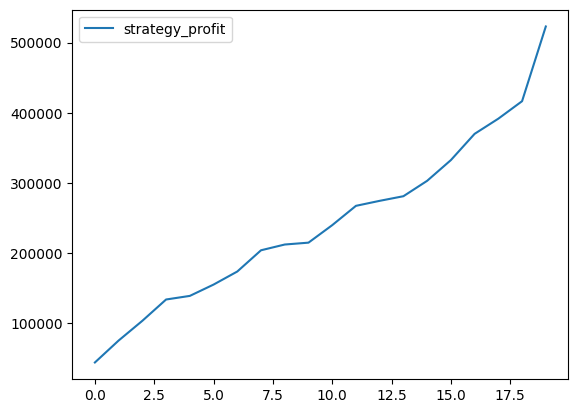

In [ ]:
#Plot the profit graph
plt.plot(profit, label = 'strategy_profit')
plt.legend()

See the results you get by selling calls and puts and just managing delta at end of day